In [5]:
import os, sys
repo_root = "/data/quo.vadis/"
sys.path.append(repo_root)
from utils.structures import report_db

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# GAMMA vs MalConv

In [8]:
malconv_reports = repo_root+"data/adversarial.emulation.dataset/reports_malconv"
malconv_hashes = [x.rstrip(".json").rstrip(".err") for x in os.listdir(malconv_reports)]
malconv_success = [x.rstrip(".json") for x in os.listdir(malconv_reports) if x.endswith(".json")]

db = report_db()
orig_success = []
for h in malconv_hashes:
    if h in db.keys():
        orig_success.append(h)

mcs = len(malconv_success)
full = len(malconv_hashes)
ors = len(orig_success)

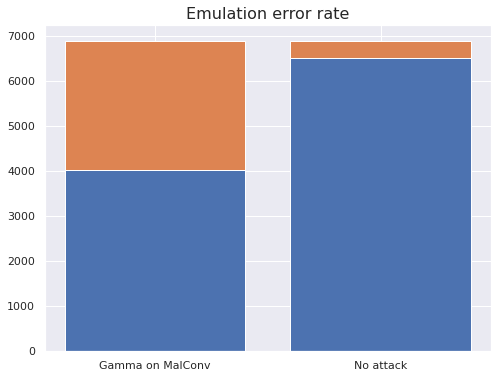

In [9]:
fig, ax = plt.subplots(figsize=(8,6))

ax.bar(x=["Gamma on MalConv", "No attack"], height=[mcs, ors])
ax.bar(x=["Gamma on MalConv", "No attack"], height=[full-mcs, full-ors], bottom=[mcs, ors])
_ = ax.set_title("Emulation error rate", fontsize=16)

# GAMMA vs Ember GBDT

## Error rates

In [6]:
ember_reports = repo_root+"data/adversarial.emulation.dataset/reports_ember"
ember_adv_hashes = [x.rstrip(".json").rstrip(".err") for x in os.listdir(ember_reports)]
ember_success_adv = [x.rstrip(".json") for x in os.listdir(ember_reports) if x.endswith(".json")]

orig_report_db = report_db()
ember_success_orig = []
for h in ember_adv_hashes:
    if h in orig_report_db.keys():
        ember_success_orig.append(h)

len_ember_success_adv = len(ember_success_adv)
len_ember_success_orig = len(ember_success_orig)
len_ember_full = len(ember_adv_hashes)

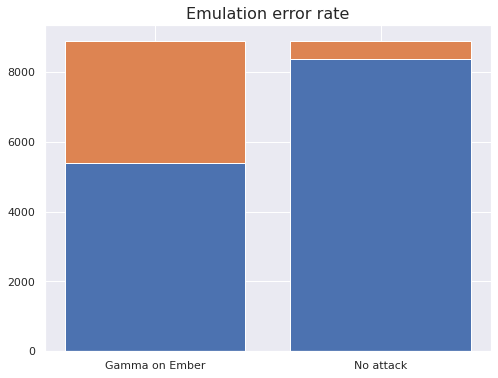

In [7]:
fig, ax = plt.subplots(figsize=(8,6))

ax.bar(x=["Gamma on Ember", "No attack"], height=[len_ember_success_adv, len_ember_success_orig])
ax.bar(x=["Gamma on Ember", "No attack"], height=[len_ember_full-len_ember_success_adv, len_ember_full-len_ember_success_orig], 
                                            bottom=[len_ember_success_adv, len_ember_success_orig])
_ = ax.set_title("Emulation error rate", fontsize=16)